In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import skcriteria as skc
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [ ]:
movies = pd.read_csv('movie_dataset.csv')
movies.head()  

In [257]:
ratings = pd.read_csv('ratings.csv')

In [258]:
movies.drop(['homepage'], axis = 1,inplace = True)
movies.head()

,index,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,movieId
0,0,237000000,Action Adventure Fantasy Science Fiction,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,1
1,1,300000000,Adventure Fantasy Action,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,2
2,2,245000000,Action Adventure Crime,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,3
3,3,250000000,Action Crime Drama Thriller,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,4
4,4,260000000,Action Adventure Science Fiction,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,5


In [259]:
final_dataset = ratings.pivot(index='movieId',columns='userId', values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,4797,4798,4799,4800,4801,4802,4803,4804,4805,4806
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,4.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,4797,4798,4799,4800,4801,4802,4803,4804,4805,4806
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,4.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [261]:
noOfUsersVoted = ratings.groupby('movieId')['rating'].agg('count')
noOfMoviesVoted = ratings.groupby('userId')['rating'].agg('count')

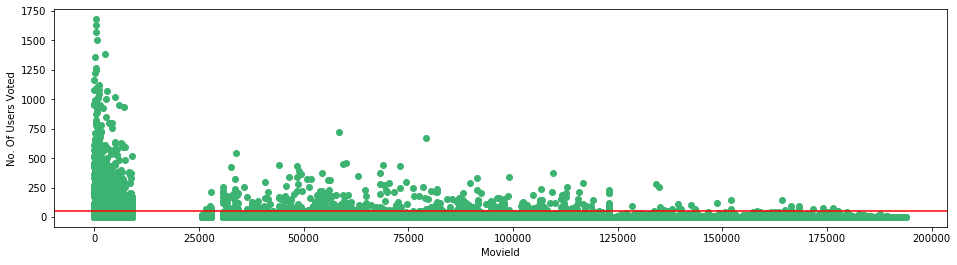

In [262]:
f,ax = plt.subplots(1,1,figsize=(16,4))
#ratings['rating'].plot(kind='hist')
plt.scatter(noOfUsersVoted.index,noOfUsersVoted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. Of Users Voted')
plt.show()

In [ ]:
final_dataset = final_dataset.loc[noOfUsersVoted[noOfUsersVoted > 50].index,:]
final_dataset

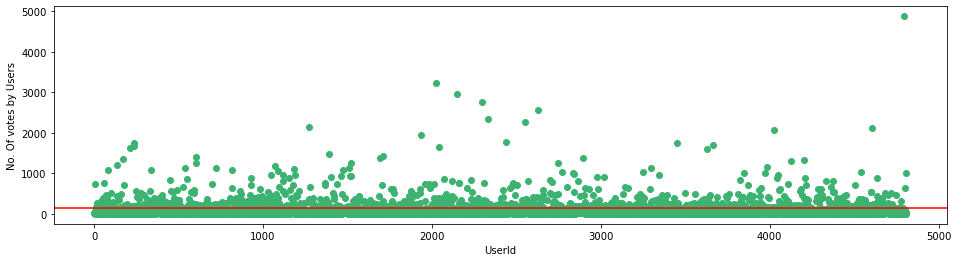

In [264]:
f,ax = plt.subplots(1,1,figsize=(16,4))
#ratings['rating'].plot(kind='hist')
plt.scatter(noOfMoviesVoted.index,noOfMoviesVoted,color='mediumseagreen')
plt.axhline(y=150,color='r')
plt.xlabel('UserId')
plt.ylabel('No. Of votes by Users')
plt.show()


In [ ]:
final_dataset=final_dataset.loc[:,noOfMoviesVoted[noOfMoviesVoted > 250].index]
final_dataset

In [266]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [267]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [306]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        records = df.to_records(index=False)
        result = list(records)
        return result
    else:
        return "No movies found. Please check your input"

In [307]:
get_movie_recommendation('Spider-Man 3')


[(0.37235984, 'Mickey Blue Eyes'),
 (0.37014234, 'Alexander'),
 (0.36770292, 'Assault on Precinct 13'),
 (0.35888102, 'Little Nicky'),
 (0.3548525, 'The Expendables 3'),
 (0.34570065, 'The Great Gatsby'),
 (0.34349582, 'Transformers: Dark of the Moon'),
 (0.33354086, 'The Chronicles of Narnia: Prince Caspian'),
 (0.32627363, 'The Shadow'),
 (0.31478215, 'The Fugitive')]

In [270]:
def get_title_from_index(index):
    indexMovie = movies[movies.index == index]["title"].values[0]  
    return indexMovie

def get_index_from_title(title):
    return movies[movies.title == title]["index"].values[0]

In [271]:
features = ['keywords', 'cast','genres', 'director']

In [272]:
for feature in features:
    movies[feature] = movies[feature].fillna('')

In [311]:
def combine_features(row):
	try:
		return row['keywords']+ " "+row['cast']+ " "+row['genres']+ " "+row['director']
	except:
		print("Error:", row)
movies["combined_features"] = movies.apply(combine_features, axis=1)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4783 entries, 0 to 4782
Data columns (total 25 columns):
index                   4783 non-null int64
budget                  4783 non-null int64
genres                  4783 non-null object
id                      4783 non-null int64
keywords                4783 non-null object
original_language       4783 non-null object
original_title          4783 non-null object
overview                4780 non-null object
popularity              4783 non-null float64
production_companies    4783 non-null object
production_countries    4783 non-null object
release_date            4782 non-null object
revenue                 4783 non-null int64
runtime                 4781 non-null float64
spoken_languages        4783 non-null object
status                  4783 non-null object
tagline                 3941 non-null object
title                   4783 non-null object
vote_average            4783 non-null float64
vote_count              4783 non-null i

In [274]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(movies["combined_features"])

In [275]:
cosineSim = cosine_similarity(count_matrix)

In [276]:
movie_index = get_index_from_title('Spider-Man 3')
similar_movies = list(enumerate(cosineSim[movie_index]))

In [312]:
similar_movies

[(0, 0.1924500897298753),
 (1, 0.2556038601690775),
 (2, 0.12510864843424488),
 (3, 0.07844645405527362),
 (4, 0.20000000000000004),
 (5, 1.0000000000000007),
 (6, 0.0),
 (7, 0.07302967433402215),
 (8, 0.12792042981336627),
 (9, 0.12247448713915893),
 (10, 0.16000000000000003),
 (11, 0.08000000000000002),
 (12, 0.12510864843424488),
 (13, 0.12000000000000002),
 (14, 0.11338934190276817),
 (15, 0.07844645405527362),
 (16, 0.07184212081070997),
 (17, 0.12792042981336627),
 (18, 0.03651483716701107),
 (19, 0.12792042981336627),
 (20, 0.16329931618554525),
 (21, 0.08164965809277262),
 (22, 0.0917662935482247),
 (23, 0.1341640786499874),
 (24, 0.10606601717798213),
 (25, 0.044721359549995794),
 (26, 0.07559289460184544),
 (27, 0.08164965809277262),
 (28, 0.08000000000000002),
 (29, 0.11338934190276817),
 (30, 0.07559289460184544),
 (31, 0.0),
 (32, 0.08728715609439697),
 (33, 0.08164965809277262),
 (34, 0.2683281572999748),
 (35, 0.11766968108291043),
 (36, 0.11766968108291043),
 (37, 0.037

In [277]:
print(type(movie_index))

<class 'numpy.int64'>


In [278]:
sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1],reverse=True)
sorted_similar_movies

[(5, 1.0000000000000007),
 (156, 0.469041575982343),
 (112, 0.28),
 (34, 0.2683281572999748),
 (1541, 0.25584085962673253),
 (1, 0.2556038601690775),
 (2011, 0.25021729686848976),
 (4375, 0.25),
 (262, 0.24000000000000005),
 (1505, 0.23533936216582085),
 (2738, 0.23533936216582085),
 (1001, 0.23094010767585035),
 (2857, 0.22941573387056174),
 (987, 0.223606797749979),
 (1002, 0.21908902300206642),
 (1690, 0.21552636243212991),
 (486, 0.21320071635561044),
 (1417, 0.2085144140570748),
 (433, 0.206418738616856),
 (801, 0.20412414523193156),
 (4, 0.20000000000000004),
 (770, 0.20000000000000004),
 (1016, 0.20000000000000004),
 (1341, 0.20000000000000004),
 (769, 0.19611613513818404),
 (1183, 0.19611613513818404),
 (1189, 0.19611613513818404),
 (1450, 0.19611613513818404),
 (0, 0.1924500897298753),
 (207, 0.1924500897298753),
 (497, 0.1924500897298753),
 (1942, 0.1924500897298753),
 (3515, 0.1924500897298753),
 (1173, 0.1889822365046136),
 (1197, 0.1889822365046136),
 (1914, 0.188982236504

In [279]:
print(type(sorted_similar_movies))

<class 'list'>


In [280]:
sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1],reverse=True)

#print("Sorted Similar movies:", sorted_similar_movies)
## Step 8: Print titles of first 50 movies
def getMostSimilar(sorted_similar_movies):
    i = 0
    listMovies = []
    for movie in sorted_similar_movies:
        sortedMovies = get_title_from_index(movie[0])        
        listMovies.append(sortedMovies)
        i = i +1
        if i>10:
            break
    
    return listMovies
getMostSimilar(sorted_similar_movies)      


['Spider-Man 3',
 'Spider-Man',
 'Hancock',
 'Oz: The Great and Powerful',
 'The Notebook',
 "Pirates of the Caribbean: At World's End",
 'Underworld',
 'The Specials',
 'The Island',
 'The Good German',
 'Crazy/Beautiful']

In [313]:
def retMovList(sorted_similar_movies):
    sortedMoviesret = getMostSimilar(sorted_similar_movies)
    list = []
    for movie in sortedMoviesret:        
        movie_index = get_index_from_title(movie)
        list.append(movie_index)
    return list

In [314]:
retMovList(sorted_similar_movies)

[5, 159, 115, 37, 1559, 1, 2029, 4395, 271, 1523, 2756]

In [283]:
def getMoviesforTopsis(sorted_similar_movies):
    movieList = retMovList(sorted_similar_movies)    
    data = movies.iloc[movieList]
    
    return data

In [284]:
re = getMoviesforTopsis(sorted_similar_movies)
re = re.iloc[1: , :]
data = re.drop(['index', 'genres','id','keywords','original_language', 'original_title','overview','production_companies','production_countries',
              'spoken_languages','status','tagline','release_date','title','vote_average','cast','crew','director','movieId','combined_features'], axis = 1)

In [285]:
def getmovieTitles(sorted_similar_movies):
    data = retMovList(sorted_similar_movies)    
    altMovies= []     
    for movie in data:
        mov = get_title_from_index(movie)
        altMovies.append(mov)
    return altMovies

In [286]:
chk = getmovieTitles(sorted_similar_movies)
corAltMovs = chk.pop(0)
corAltMovs

'Spider-Man 3'

In [287]:
chk

['Stealth',
 'Ratatouille',
 'Cars 2',
 'Without a Paddle',
 "Pirates of the Caribbean: At World's End",
 'Megiddo: The Omega Code 2',
 'Snow White: A Deadly Summer',
 'Public Enemies',
 'Toy Story',
 'Faithful']

In [288]:
w = [0.3,0.2,0.2,0.15,0.15]

In [289]:
#Data Normalisation
data_norm = data/np.sqrt(np.power(data,2).sum(axis=0))
data_norm

,budget,popularity,revenue,runtime,vote_count
159,0.319482,0.098312,0.056992,0.337853,0.038689
115,0.354980,0.360932,0.462051,0.309931,0.510669
37,0.473307,0.274703,0.414736,0.295970,0.237627
1559,0.044964,0.047176,0.051582,0.265257,0.025013
1,0.709960,0.764332,0.711904,0.471877,0.525981
2029,0.000000,0.004449,0.000000,0.290386,0.000935
4395,0.002367,0.003591,0.000000,0.237335,0.001286
271,0.189323,0.185154,0.158608,0.390904,0.157093
1523,0.070996,0.404693,0.276727,0.226166,0.615866
2756,0.030765,0.009053,0.007252,0.254088,0.000468


In [290]:
data_normW = data_norm*w
data_normW

,budget,popularity,revenue,runtime,vote_count
159,0.095845,0.019662,0.011398,0.050678,0.005803
115,0.106494,0.072186,0.092410,0.046490,0.076600
37,0.141992,0.054941,0.082947,0.044396,0.035644
1559,0.013489,0.009435,0.010316,0.039788,0.003752
1,0.212988,0.152866,0.142381,0.070782,0.078897
2029,0.000000,0.000890,0.000000,0.043558,0.000140
4395,0.000710,0.000718,0.000000,0.035600,0.000193
271,0.056797,0.037031,0.031722,0.058636,0.023564
1523,0.021299,0.080939,0.055345,0.033925,0.092380
2756,0.009229,0.001811,0.001450,0.038113,0.000070


In [291]:
data_normW.min()

budget        0.000000
popularity    0.000718
revenue       0.000000
runtime       0.033925
vote_count    0.000070
dtype: float64

In [292]:
positive_ideal = data_normW.max()
negative_ideal = data_normW.min()

In [293]:
SM_P = np.sqrt(np.power(data_normW - positive_ideal,2).sum(axis=1))
SM_N = np.sqrt(np.power(data_normW - negative_ideal,2).sum(axis=1))

In [294]:
result = pd.DataFrame(SM_N/(SM_N+SM_P))
result.columns = ['AltMovie']

In [295]:

result.sort_values(['AltMovie'], ascending= False)

,AltMovie
1,0.958374
115,0.547448
37,0.543749
1523,0.376061
159,0.295963
271,0.259015
1559,0.064537
2756,0.032529
2029,0.029861
4395,0.005785


In [193]:
!pip install -U scikit-criteria

  Using cached scikit-criteria-0.5.tar.gz (35 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pyquery-1.4.3-py3-none-any.whl (22 kB)
  Using cached custom_inherit-2.4.0-py3-none-any.whl (15 kB)
  Using cached PuLP-2.6.0-py3-none-any.whl (14.2 MB)
  Using cached cssselect-1.1.0-py2.py3-none-any.whl (16 kB)
  Created wheel for scikit-criteria: filename=scikit_criteria-0.5-py3-none-any.whl size=47788 sha256=e52270df9fb2838534554291d61bbc182abc9c23e529f121578a6d7098b425e0
  Stored in directory: c:\users\modib\appdata\local\pip\cache\wheels\b4\1e\09\b0bb0971d2260f050cb70f792ab7bb0fd2685ff730e57f822b
Successfully built scikit-criteria


In [296]:
obj = [max,min,max,min,max]
obj

[<function max>,
 <function min>,
 <function max>,
 <function min>,
 <function max>]

In [297]:
alternatives = chk
alternatives
weights = [1,1,1,1,1]

In [245]:
d2.index=alternatives
d2

,budget,popularity,revenue,runtime,vote_count
Stealth,135000000,17.889530,76932943,121.0,331
Ratatouille,150000000,65.677399,623722818,111.0,4369
Cars 2,200000000,49.986590,559852396,106.0,2033
Without a Paddle,19000000,8.584398,69631118,95.0,214
Pirates of the Caribbean: At World's End,300000000,139.082615,961000000,169.0,4500
Megiddo: The Omega Code 2,0,0.809588,0,104.0,8
Snow White: A Deadly Summer,1000000,0.653495,0,85.0,11
Public Enemies,80000000,33.691694,214104620,140.0,1344
Toy Story,30000000,73.640445,373554033,81.0,5269
Faithful,13000000,1.647335,9789900,91.0,4


In [298]:
print(pd.__version__)

0.23.0


In [ ]:
def biasGenreRating(genreRatings, scorelimit_1, scorelimit_2):
    biased_dataset = genreRatings[((genreRatings['avgAdventureRating'] < scorelimit_1 - 0.2) & (genreRatings['avgActionRating'] > scorelimit_2))
                                  | ((genreRatings['avgAdventureRating']> scorelimit_2) & (genreRatings['avgActionRating']< scorelimit_1))]
    biased_dataset = pd.concat([biased_dataset[:300], genreRatings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset

In [ ]:
# apply the Bias to the dataset
biased_dataset = biasGenreRating(genreRatings, 3.2, 2.5)

#Print the result number of records and the head of the dataset
print("Number of records: ", len(biased_dataset))
biased_dataset.head()

In [ ]:
#Defining the scatterplot drawing function
def viewScatterPlot(x_data, y_data, x_label, y_label):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    
    plt.xlim(0,5)
    plt.ylim(0,5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data,y_data, s=30)
viewScatterPlot(biased_dataset['avgActionRating'], biased_dataset['avgAdventureRating'], 'Avg Action Rating', 'Avg Adventure rating')

In [ ]:
X = biased_dataset[['avgAdventureRating', 'avgActionRating']].values

#import Kmeans
from sklearn.cluster import KMeans
kmeans_1 = KMeans(n_clusters = 2)

predictions = kmeans_1.fit_predict(X)
def drawClusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0,5)
    plt.ylim(0,5)
    ax.set_xlabel('avgAdventureRating')
    ax.set_ylabel('avgActionRating')
    
    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['avgAdventureRating'], clustered['avgActionRating'], c=clustered['group'], s=20, cmap=cmap)
drawClusters(biased_dataset,predictions)
    

In [ ]:
kmeans_2 = KMeans(n_clusters=3)

predictions_2 = kmeans_2.fit_predict(X)

drawClusters(biased_dataset, predictions_2)

In [ ]:
kmeans_3 = KMeans(n_clusters=4)

predictions_3 = kmeans_3.fit_predict(X)
drawClusters(biased_dataset, predictions_3)

In [ ]:
df = biased_dataset[['avgActionRating', 'avgAdventureRating']]

possible_k_values = range(2, len(X)+1, 5)

def ClusterringErrors(k, data):
    kmeans = KMeans(n_clusters=k).fit(data)
    predictions = kmeans.predict(data)
    #cluster_centers = kmeans.cluster_centers_
    # errors = [mean_squared_error(row, cluster_centers[cluster]) for row, cluster in zip(data.values, predictions)]
    # return sum(errors)
    silhoueteAvg = silhouette_score(data,predictions)
    return silhoueteAvg

errors_per_k = [ClusterringErrors(k,X) for k in possible_k_values]

fig, ax = plt.subplots(figsize=(20,6))
plt.plot(possible_k_values, errors_per_k)

xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k),2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

In [ ]:
kmeans_4 = KMeans(n_clusters=7)

predictions_4 = kmeans_4.fit_predict(X)
drawClusters(biased_dataset, predictions_4, cmap='Accent')

In [ ]:
biased_dataset_3Genres = getGenreRatings(ratings,movies,['Action','Adventure','Romance'],
                                         ['avgActionRating', 'avgAdventureRating','avgRomanceRating'])
biased_dataset_3Genres = biasGenreRating(biased_dataset_3Genres, 3.2,2.5).dropna()
print("Number of records: ", len(biased_dataset_3Genres))
biased_dataset_3Genres.head()

In [ ]:
X_MoreGenres = biased_dataset_5Genres[['avgActionRating','avgAdventureRating', 'avgRomanceRating']].values
kmeans_5 = KMeans(n_clusters=7)
predictions_5 = kmeans_5.fit_predict(X_MoreGenres)

def drawClusters3d(biased_dataset_5, predictions):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('avgAdventureRating')
    ax.set_ylabel('avgRomanceRating')
    clustered = pd.concat([biased_dataset_3Genres.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    colors = itertools.cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])
    for g in clustered.group.unique():
            color = next(colors)
            for index, point in clustered[clustered.group == g].iterrows():
                if point['avgActionRating'].astype(float) > 3: 
                    size = 50
                else:
                    size = 15
                plt.scatter(point['avgAdventureRating'], 
                            point['avgRomanceRating'], 
                            s=size, 
                            color=color)
    # Plot
drawClusters3d(biased_dataset_5Genres, predictions_5)

In [ ]:
biased_dataset_5Genres = getGenreRatings(ratings,movies,['Action','Adventure','Romance', 'Comedy','Fantasy'],
                                         ['avgActionRating', 'avgAdventureRating','avgRomanceRating','avgComedyRating','avgFantasyRating'])
biased_dataset_5Genres = biasGenreRating(biased_dataset_5Genres, 3.2,2.5).dropna()
print("Number of records: ", len(biased_dataset_3Genres))
biased_dataset_5Genres.head()

In [ ]:
X_MoreGenres = biased_dataset_5Genres[['avgActionRating','avgAdventureRating', 'avgRomanceRating',
                                       'avgComedyRating','avgFantasyRating']].values
kmeans_5 = KMeans(n_clusters=7)
predictions_5 = kmeans_5.predict(X_MoreGenres)

def drawClusters3d(biased_dataset_5, predictions):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('avgAdventureRating')
    ax.set_ylabel('avgRomanceRating')
    clustered = pd.concat([biased_dataset_3.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    colors = itertools.cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])
    for g in clustered.group.unique():
            color = next(colors)
            for index, point in clustered[clustered.group == g].iterrows():
                if point['avgActionRating'].astype(float) > 3: 
                    size = 50
                else:
                    size = 15
                plt.scatter(point['avgAdventureRating'], 
                            point['avgRomanceRating'], 
                            s=size, 
                            color=color)
    # Plot
drawClusters3d(biased_dataset_5Genres, predictions_5)

In [ ]:
ratings_title = pd.merge(ratings,movies[['movieId','title']],on = 'movieId')
user_movieRatings = pd.pivot_table(ratings_title, index='userId', columns='title', values='rating')

print('dataset dimensions: ', user_movieRatings.shape)
user_movieRatings.iloc[:6, :10]

In [ ]:
movRatings = pd.merge(ratings, movies, on='movieId')
movRatings.head(2)

In [ ]:
moviex = user_movieRatings['10 Things I Hate About You']
moviex

In [ ]:
ratings_mean_count = pd.DataFrame(movRatings.groupby('title')['rating'].mean())

In [ ]:
ratings_users_count = pd.DataFrame(user_movieRatings.count(axis='columns').sort_values(ascending=False))
ratings_users_count

In [ ]:
ratings_mean_count['rating_counts'] = pd.DataFrame(user_movieRatings.groupby('title')['title'].count())
ratings_mean_count.head()

In [ ]:
#ratings['movieId'].value_counts()[:30].sort_values(ascending=False)
movRatings.set_index('userId')
movRatings.head(2)

In [ ]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

In [ ]:
def getMostRatedMovies(user_movieRatings, n_movies):
    ratedMovies = user_movieRatings.count().sort_values(ascending=False)[:n_movies]
   
    return ratedMovies
n_movies = 30
ratedmovies = getMostRatedMovies(user_movieRatings, n_movies)
ratedmovies

In [ ]:
def getUsersWhoRateTheMost(ratedMovies,n_users):
    ratedUsers = getMostRatedMovies.count(axis='columns').sort_values(ascending=False)[:n_users]   
    print(ratedUsers.head)
    return getUsersWhoRateTheMost
n_users = 18
getUsersWhoRateTheMost(ratedMovies,n_users)

In [ ]:
ratedUsers = user_movieRatings.groupby('userId').agg('count')
ratedUsers

In [ ]:
def sortByRatingDensity(user_movieRatings, n_movies, n_users):
    mostRatedMovies = getMostRatedMovies(user_movieRatings, n_movies)
    mostRatedMovies = getUsersWhoRateTheMost(mostRatedMovies, n_users)
    
    return mostRatedMovies
n_movies = 30
n_users = 18
mostRatedMoviesUsersSelection = sortByRatingDensity(user_movieRatings, n_movies, n_users)

print('dataset dimensions: ', mostRatedMoviesUsersSelection.shape())
mostRatedMoviesUsersSelection.head()